<div align="center">

# TUGAS BESAR DKA  
## Prediksi Risiko Penyakit Jantung Menggunakan Metode Fuzzy Mamdani dan Sugeno  
### Studi Kasus pada Dataset Heart Disease  

Sistem ini dirancang untuk melakukan prediksi tingkat risiko penyakit jantung berdasarkan data kesehatan pasien nyeri dada, tingkat depresi ST, detak jantung maksimal, kondisi nyeri dada, angina yang diinduksi oleh olahraga dan usia.  
Dengan memanfaatkan metode logika fuzzy Mamdani dan Sugeno, sistem ini bertujuan memberikan pendekatan yang fleksibel dan interpretable untuk pengambilan keputusan medis awal.  selain itu nanti akan dibandingkan antara metode Mamdani dan Sugeno

</div>


### METODE MAMDANI ###

1. Membership Function

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
cp = ctrl.Antecedent(np.arange(0, 4, 1), 'cp')
oldpeak = ctrl.Antecedent(np.arange(0, 7, 0.1), 'oldpeak')
thalach = ctrl.Antecedent(np.arange(70, 211, 1), 'thalach')
exang = ctrl.Antecedent(np.arange(0, 2, 1), 'exang')
age = ctrl.Antecedent(np.arange(29, 78, 1), 'age')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# Membership function definitions
cp['low'] = fuzz.trimf(cp.universe, [0, 0, 1])
cp['medium'] = fuzz.trimf(cp.universe, [0, 1, 2])
cp['high'] = fuzz.trimf(cp.universe, [1, 3, 3])

oldpeak['low'] = fuzz.trimf(oldpeak.universe, [0, 0, 2])
oldpeak['medium'] = fuzz.trimf(oldpeak.universe, [1, 2.5, 4])
oldpeak['high'] = fuzz.trimf(oldpeak.universe, [3, 6, 6])

thalach['low'] = fuzz.trimf(thalach.universe, [70, 90, 130])
thalach['medium'] = fuzz.trimf(thalach.universe, [100, 140, 180])
thalach['high'] = fuzz.trimf(thalach.universe, [160, 200, 210])

exang['no'] = fuzz.trimf(exang.universe, [0, 0, 1])
exang['yes'] = fuzz.trimf(exang.universe, [0, 1, 1])

age['young'] = fuzz.trimf(age.universe, [29, 35, 45])
age['middle'] = fuzz.trimf(age.universe, [40, 50, 60])
age['old'] = fuzz.trimf(age.universe, [55, 65, 77])

risk['low'] = fuzz.trimf(risk.universe, [0, 0, 40])
risk['medium'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['high'] = fuzz.trimf(risk.universe, [60, 100, 100])


2. Visualisasi Membership

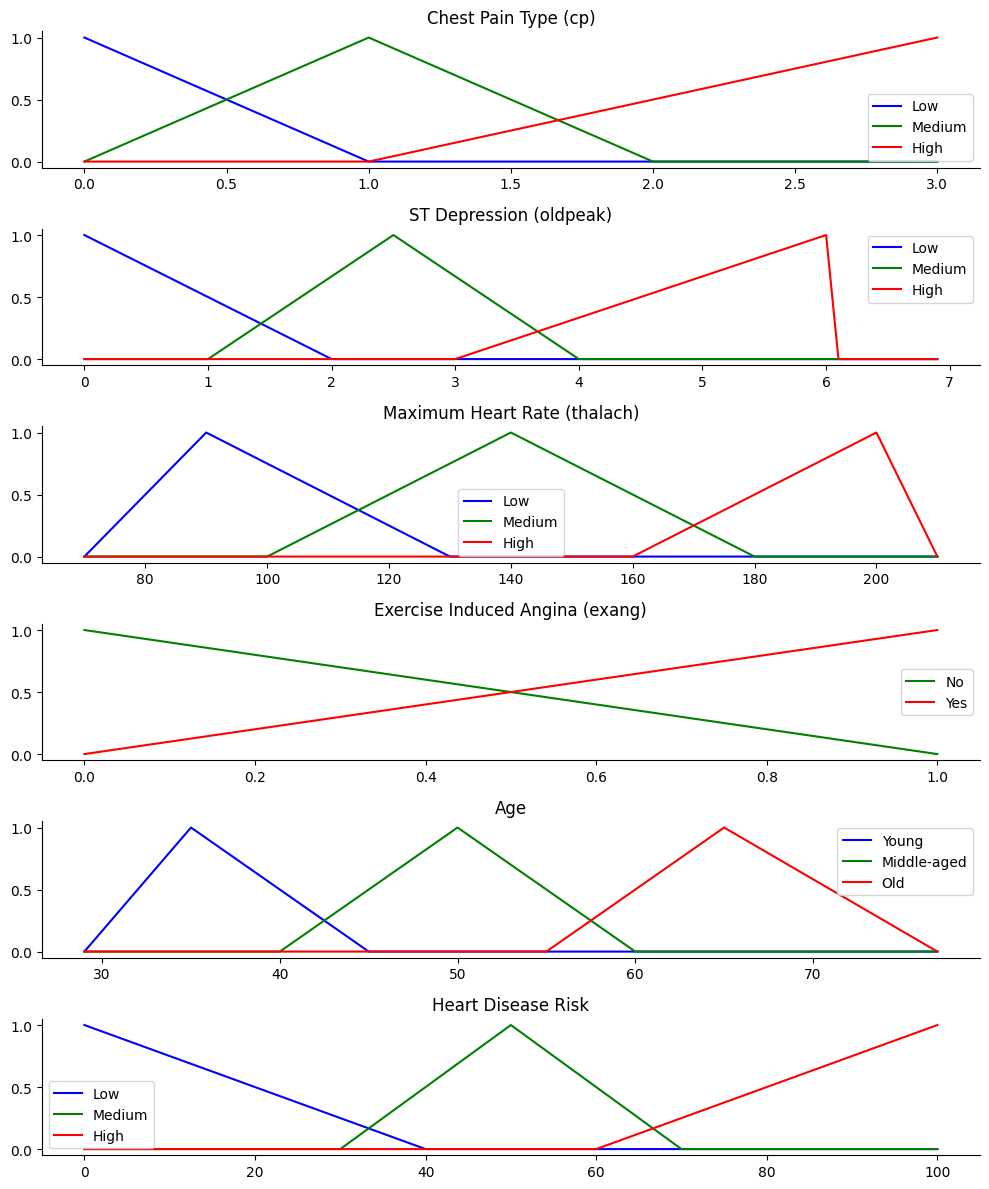

In [21]:
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6, figsize=(10, 12))

# cp: Chest Pain
ax0.plot(cp.universe, cp['low'].mf, 'b', linewidth=1.5, label='Low')
ax0.plot(cp.universe, cp['medium'].mf, 'g', linewidth=1.5, label='Medium')
ax0.plot(cp.universe, cp['high'].mf, 'r', linewidth=1.5, label='High')
ax0.set_title('Chest Pain Type (cp)')
ax0.legend()

# oldpeak: ST depression
ax1.plot(oldpeak.universe, oldpeak['low'].mf, 'b', linewidth=1.5, label='Low')
ax1.plot(oldpeak.universe, oldpeak['medium'].mf, 'g', linewidth=1.5, label='Medium')
ax1.plot(oldpeak.universe, oldpeak['high'].mf, 'r', linewidth=1.5, label='High')
ax1.set_title('ST Depression (oldpeak)')
ax1.legend()

# thalach: Maximum Heart Rate
ax2.plot(thalach.universe, thalach['low'].mf, 'b', linewidth=1.5, label='Low')
ax2.plot(thalach.universe, thalach['medium'].mf, 'g', linewidth=1.5, label='Medium')
ax2.plot(thalach.universe, thalach['high'].mf, 'r', linewidth=1.5, label='High')
ax2.set_title('Maximum Heart Rate (thalach)')
ax2.legend()

# exang: Exercise Induced Angina
ax3.plot(exang.universe, exang['no'].mf, 'g', linewidth=1.5, label='No')
ax3.plot(exang.universe, exang['yes'].mf, 'r', linewidth=1.5, label='Yes')
ax3.set_title('Exercise Induced Angina (exang)')
ax3.legend()

# age: Age
ax4.plot(age.universe, age['young'].mf, 'b', linewidth=1.5, label='Young')
ax4.plot(age.universe, age['middle'].mf, 'g', linewidth=1.5, label='Middle-aged')
ax4.plot(age.universe, age['old'].mf, 'r', linewidth=1.5, label='Old')
ax4.set_title('Age')
ax4.legend()

# risk: Output Risk
ax5.plot(risk.universe, risk['low'].mf, 'b', linewidth=1.5, label='Low')
ax5.plot(risk.universe, risk['medium'].mf, 'g', linewidth=1.5, label='Medium')
ax5.plot(risk.universe, risk['high'].mf, 'r', linewidth=1.5, label='High')
ax5.set_title('Heart Disease Risk')
ax5.legend()

# Clean up plots
for ax in (ax0, ax1, ax2, ax3, ax4, ax5):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()


3. Ekstrak Data

In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart.csv')

# Pilih hanya 5 fitur yang digunakan dalam fuzzy system
selected_features = ['cp', 'oldpeak', 'thalach', 'exang', 'age']
df_selected = df[selected_features].copy()

# Tampilkan beberapa data pertama
df_selected.head()


,cp,oldpeak,thalach,exang,age
0,3,2.3,150,0,63
1,2,3.5,187,0,37
2,1,1.4,172,0,41
3,1,0.8,178,0,56
4,0,0.6,163,1,57


4. Fuzzification

In [24]:
# Membuat list kosong untuk menyimpan hasil fuzzifikasi
data_fz_cp_low = []
data_fz_cp_medium = []
data_fz_cp_high = []

data_fz_oldpeak_low = []
data_fz_oldpeak_medium = []
data_fz_oldpeak_high = []

data_fz_thalach_low = []
data_fz_thalach_medium = []
data_fz_thalach_high = []

data_fz_exang_no = []
data_fz_exang_yes = []

data_fz_age_young = []
data_fz_age_middle = []
data_fz_age_old = []

# Lakukan fuzzifikasi per baris data
for _, row in df_selected.iterrows():
    cp_val = row['cp']
    oldpeak_val = row['oldpeak']
    thalach_val = row['thalach']
    exang_val = row['exang']
    age_val = row['age']

    # Fuzzifikasi nilai crisp menjadi derajat keanggotaan fuzzy
    data_fz_cp_low.append(fuzz.interp_membership(cp.universe, cp['low'].mf, cp_val))
    data_fz_cp_medium.append(fuzz.interp_membership(cp.universe, cp['medium'].mf, cp_val))
    data_fz_cp_high.append(fuzz.interp_membership(cp.universe, cp['high'].mf, cp_val))

    data_fz_oldpeak_low.append(fuzz.interp_membership(oldpeak.universe, oldpeak['low'].mf, oldpeak_val))
    data_fz_oldpeak_medium.append(fuzz.interp_membership(oldpeak.universe, oldpeak['medium'].mf, oldpeak_val))
    data_fz_oldpeak_high.append(fuzz.interp_membership(oldpeak.universe, oldpeak['high'].mf, oldpeak_val))

    data_fz_thalach_low.append(fuzz.interp_membership(thalach.universe, thalach['low'].mf, thalach_val))
    data_fz_thalach_medium.append(fuzz.interp_membership(thalach.universe, thalach['medium'].mf, thalach_val))
    data_fz_thalach_high.append(fuzz.interp_membership(thalach.universe, thalach['high'].mf, thalach_val))

    data_fz_exang_no.append(fuzz.interp_membership(exang.universe, exang['no'].mf, exang_val))
    data_fz_exang_yes.append(fuzz.interp_membership(exang.universe, exang['yes'].mf, exang_val))

    data_fz_age_young.append(fuzz.interp_membership(age.universe, age['young'].mf, age_val))
    data_fz_age_middle.append(fuzz.interp_membership(age.universe, age['middle'].mf, age_val))
    data_fz_age_old.append(fuzz.interp_membership(age.universe, age['old'].mf, age_val))

# Hasil fuzzifikasi siap digunakan untuk evaluasi visual atau inference
df_fuzzified = pd.DataFrame({
    'cp_low': data_fz_cp_low,
    'cp_medium': data_fz_cp_medium,
    'cp_high': data_fz_cp_high,
    'oldpeak_low': data_fz_oldpeak_low,
    'oldpeak_medium': data_fz_oldpeak_medium,
    'oldpeak_high': data_fz_oldpeak_high,
    'thalach_low': data_fz_thalach_low,
    'thalach_medium': data_fz_thalach_medium,
    'thalach_high': data_fz_thalach_high,
    'exang_no': data_fz_exang_no,
    'exang_yes': data_fz_exang_yes,
    'age_young': data_fz_age_young,
    'age_middle': data_fz_age_middle,
    'age_old': data_fz_age_old
})

# Menampilkan dataframe hasil fuzzifikasi
df_fuzzified.head()


,cp_low,cp_medium,cp_high,oldpeak_low,oldpeak_medium,oldpeak_high,thalach_low,thalach_medium,thalach_high,exang_no,exang_yes,age_young,age_middle,age_old
0,0.0,0.0,1.0,0.0,0.866667,0.000000,0.0,0.750,0.000,1.0,0.0,0.0,0.0,0.8
1,0.0,0.0,0.5,0.0,0.333333,0.166667,0.0,0.000,0.675,1.0,0.0,0.8,0.0,0.0
2,0.0,1.0,0.0,0.3,0.266667,0.000000,0.0,0.200,0.300,1.0,0.0,0.4,0.1,0.0
3,0.0,1.0,0.0,0.6,0.000000,0.000000,0.0,0.050,0.450,1.0,0.0,0.0,0.4,0.1
4,1.0,0.0,0.0,0.7,0.000000,0.000000,0.0,0.425,0.075,0.0,1.0,0.0,0.3,0.2


5. Fuzzy Rules

In [26]:
from skfuzzy.control import Rule

rule1 = ctrl.Rule(cp['high'] & oldpeak['high'] & exang['yes'], risk['high'])
rule2 = ctrl.Rule(cp['medium'] & oldpeak['medium'] & thalach['low'], risk['medium'])
rule3 = ctrl.Rule(cp['low'] & oldpeak['low'] & thalach['high'], risk['low'])

rule4 = ctrl.Rule(age['old'] & exang['yes'] & oldpeak['medium'], risk['high'])
rule5 = ctrl.Rule(age['young'] & thalach['high'] & cp['low'], risk['low'])

rule6 = ctrl.Rule(cp['medium'] & exang['no'] & thalach['medium'], risk['medium'])
rule7 = ctrl.Rule(age['middle'] & cp['medium'] & oldpeak['medium'], risk['medium'])

rule8 = ctrl.Rule(age['old'] & oldpeak['high'], risk['high'])
rule9 = ctrl.Rule(thalach['low'] & exang['yes'], risk['high'])
rule10 = ctrl.Rule(cp['low'] & oldpeak['low'] & exang['no'] & thalach['high'], risk['low'])

rule11 = ctrl.Rule(cp['high'] & thalach['low'] & age['old'], risk['high'])
rule12 = ctrl.Rule(cp['medium'] & oldpeak['low'] & thalach['medium'], risk['medium'])
rule13 = ctrl.Rule(cp['low'] & thalach['high'] & exang['no'], risk['low'])
rule14 = ctrl.Rule(oldpeak['high'] & thalach['low'] & exang['yes'], risk['high'])
rule15 = ctrl.Rule(age['young'] & cp['low'] & oldpeak['low'], risk['low'])

# Tambahan rule untuk mengurangi nilai ambigu (50.0)
rule16 = ctrl.Rule(cp['medium'] & oldpeak['low'] & thalach['high'], risk['low'])
rule17 = ctrl.Rule(cp['low'] & oldpeak['medium'] & age['middle'], risk['medium'])
rule18 = ctrl.Rule(cp['high'] & oldpeak['medium'] & thalach['medium'], risk['high'])
rule19 = ctrl.Rule(cp['medium'] & thalach['low'] & age['young'], risk['medium'])
rule20 = ctrl.Rule(cp['low'] & exang['yes'] & oldpeak['medium'], risk['medium'])

# Sistem kontrol fuzzy dengan total 15 aturan
mamdani_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5,
    rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, 
    rule16, rule17, rule18, rule19, rule20, 
])

# Buat simulasi inference Mamdani
mamdani_simulation = ctrl.ControlSystemSimulation(mamdani_ctrl)



6. Inferensi dan Defuzzification

In [27]:
# Lakukan inferensi menggunakan mamdani_simulation untuk setiap baris pada df_selected
prediksi_risk_mamdani = []

for _, row in df_selected.iterrows():
    try:
        mamdani_simulation.input['cp'] = row['cp']
        mamdani_simulation.input['oldpeak'] = row['oldpeak']
        mamdani_simulation.input['thalach'] = row['thalach']
        mamdani_simulation.input['exang'] = row['exang']
        mamdani_simulation.input['age'] = row['age']

        mamdani_simulation.compute()
        result = mamdani_simulation.output['risk']

        if not np.isnan(result):
            prediksi_risk_mamdani.append(result)
        else:
            prediksi_risk_mamdani.append(50.0)  # fallback jika hasil NaN

    except:
        prediksi_risk_mamdani.append(50.0)  # fallback jika error

# Tambahkan hasil prediksi ke dataframe
df_selected['prediksi_risk_mamdani'] = prediksi_risk_mamdani

# Tampilkan 500 baris pertama
df_selected[['cp', 'oldpeak', 'thalach', 'exang', 'age', 'prediksi_risk_mamdani']].head(50)


,cp,oldpeak,thalach,exang,age,prediksi_risk_mamdani
0,3,2.3,150,0,63,86.000000
1,2,3.5,187,0,37,50.000000
2,1,1.4,172,0,41,30.574661
3,1,0.8,178,0,56,19.710824
4,0,0.6,163,1,57,19.259740
5,0,0.4,148,0,57,50.000000
6,1,1.3,153,0,56,50.000000
7,1,0.0,173,0,44,28.910364
8,2,0.5,162,0,52,50.000000
9,2,1.6,174,0,57,81.459459


7. evaluasi Akurasi 

In [29]:
# Import library evaluasi
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Muat ulang dataset untuk ambil kolom target
df_full = pd.read_csv('heart.csv')  # pastikan path sesuai

# Tambahkan target ke dataframe prediksi
df_selected['target'] = df_full['target']

# Binerisasi hasil prediksi fuzzy (threshold = 50)
df_selected['prediksi_kategori'] = df_selected['prediksi_risk_mamdani'].apply(lambda x: 1 if x > 50 else 0)

# Hitung metrik evaluasi
y_true = df_selected['target']
y_pred = df_selected['prediksi_kategori']

akurasi = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, output_dict=False)

# Tampilkan hasil evaluasi
print("Akurasi Prediksi Fuzzy Mamdani:", round(akurasi * 100, 2), "%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

evaluasi_tabel = df_selected[[
    'cp', 'oldpeak', 'thalach', 'exang', 'age',
    'prediksi_risk_mamdani', 'target', 'prediksi_kategori'
]]

evaluasi_tabel

Akurasi Prediksi Fuzzy Mamdani: 32.01 %

Confusion Matrix:
 [[ 63  75]
 [131  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.46      0.38       138
           1       0.31      0.21      0.25       165

    accuracy                           0.32       303
   macro avg       0.32      0.33      0.31       303
weighted avg       0.32      0.32      0.31       303



,cp,oldpeak,thalach,exang,age,prediksi_risk_mamdani,target,prediksi_kategori
0,3,2.3,150,0,63,86.000000,1,1
1,2,3.5,187,0,37,50.000000,1,0
2,1,1.4,172,0,41,30.574661,1,0
3,1,0.8,178,0,56,19.710824,1,0
4,0,0.6,163,1,57,19.259740,1,0
...,...,...,...,...,...,...,...,...
298,0,0.2,123,1,57,81.694064,0,1
299,3,1.2,132,0,45,81.301587,0,1
300,0,3.4,141,0,68,81.301587,0,1
301,0,1.2,115,1,57,74.159289,0,1


8. Visualisasi Prediksi dengan Target

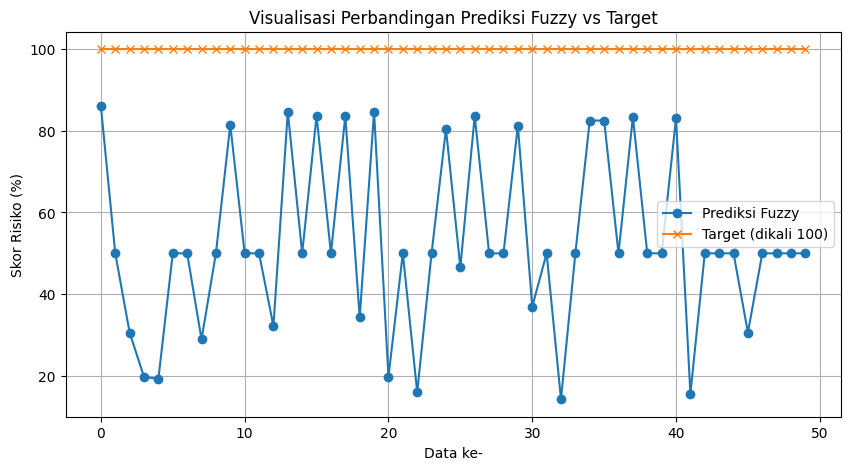

In [30]:
plt.figure(figsize=(10,5))
plt.plot(df_selected['prediksi_risk_mamdani'][:50], label='Prediksi Fuzzy', marker='o')
plt.plot(df_selected['target'][:50]*100, label='Target (dikali 100)', marker='x')
plt.legend()
plt.title('Visualisasi Perbandingan Prediksi Fuzzy vs Target')
plt.xlabel('Data ke-')
plt.ylabel('Skor Risiko (%)')
plt.grid(True)
plt.show()


### METODE SUGENO ###

1. Membership Function

In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy input variables (Antecedents) - sama seperti Mamdani
cp = ctrl.Antecedent(np.arange(0, 4, 1), 'cp')
oldpeak = ctrl.Antecedent(np.arange(0, 7, 0.1), 'oldpeak')
thalach = ctrl.Antecedent(np.arange(70, 211, 1), 'thalach')
exang = ctrl.Antecedent(np.arange(0, 2, 1), 'exang')
age = ctrl.Antecedent(np.arange(29, 78, 1), 'age')

# Membership function definitions
cp['low'] = fuzz.trimf(cp.universe, [0, 0, 1])
cp['medium'] = fuzz.trimf(cp.universe, [0, 1, 2])
cp['high'] = fuzz.trimf(cp.universe, [1, 3, 3])

oldpeak['low'] = fuzz.trimf(oldpeak.universe, [0, 0, 2])
oldpeak['medium'] = fuzz.trimf(oldpeak.universe, [1, 2.5, 4])
oldpeak['high'] = fuzz.trimf(oldpeak.universe, [3, 6, 6])

thalach['low'] = fuzz.trimf(thalach.universe, [70, 90, 130])
thalach['medium'] = fuzz.trimf(thalach.universe, [100, 140, 180])
thalach['high'] = fuzz.trimf(thalach.universe, [160, 200, 210])

exang['no'] = fuzz.trimf(exang.universe, [0, 0, 1])
exang['yes'] = fuzz.trimf(exang.universe, [0, 1, 1])

age['young'] = fuzz.trimf(age.universe, [29, 35, 45])
age['middle'] = fuzz.trimf(age.universe, [40, 50, 60])
age['old'] = fuzz.trimf(age.universe, [55, 65, 77])


2. visualisasi Membership

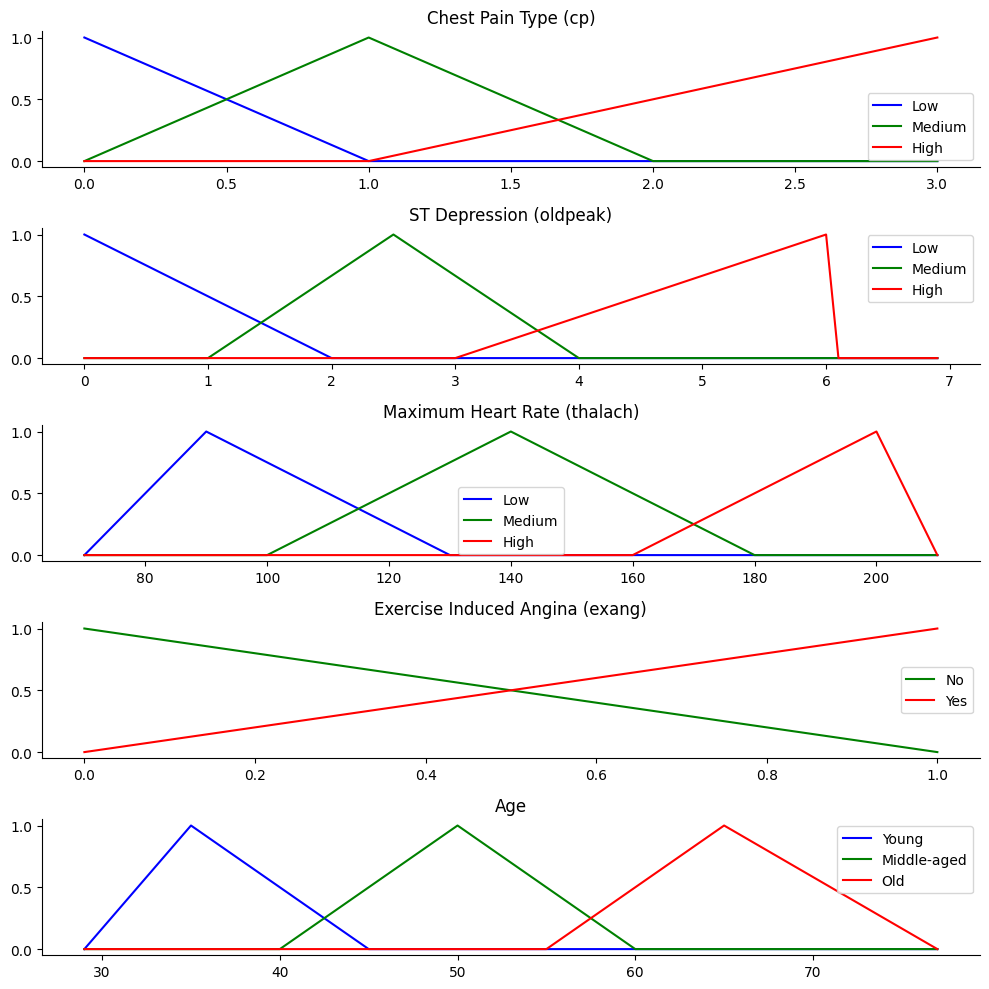

In [33]:
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(10, 10))

# cp: Chest Pain
ax0.plot(cp.universe, cp['low'].mf, 'b', linewidth=1.5, label='Low')
ax0.plot(cp.universe, cp['medium'].mf, 'g', linewidth=1.5, label='Medium')
ax0.plot(cp.universe, cp['high'].mf, 'r', linewidth=1.5, label='High')
ax0.set_title('Chest Pain Type (cp)')
ax0.legend()

# oldpeak: ST depression
ax1.plot(oldpeak.universe, oldpeak['low'].mf, 'b', linewidth=1.5, label='Low')
ax1.plot(oldpeak.universe, oldpeak['medium'].mf, 'g', linewidth=1.5, label='Medium')
ax1.plot(oldpeak.universe, oldpeak['high'].mf, 'r', linewidth=1.5, label='High')
ax1.set_title('ST Depression (oldpeak)')
ax1.legend()

# thalach: Maximum Heart Rate
ax2.plot(thalach.universe, thalach['low'].mf, 'b', linewidth=1.5, label='Low')
ax2.plot(thalach.universe, thalach['medium'].mf, 'g', linewidth=1.5, label='Medium')
ax2.plot(thalach.universe, thalach['high'].mf, 'r', linewidth=1.5, label='High')
ax2.set_title('Maximum Heart Rate (thalach)')
ax2.legend()

# exang: Exercise Induced Angina
ax3.plot(exang.universe, exang['no'].mf, 'g', linewidth=1.5, label='No')
ax3.plot(exang.universe, exang['yes'].mf, 'r', linewidth=1.5, label='Yes')
ax3.set_title('Exercise Induced Angina (exang)')
ax3.legend()

# age: Age
ax4.plot(age.universe, age['young'].mf, 'b', linewidth=1.5, label='Young')
ax4.plot(age.universe, age['middle'].mf, 'g', linewidth=1.5, label='Middle-aged')
ax4.plot(age.universe, age['old'].mf, 'r', linewidth=1.5, label='Old')
ax4.set_title('Age')
ax4.legend()

# Clean up plots
for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()


3. Ekstrak Data

In [34]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart.csv')

# Pilih hanya 5 fitur yang digunakan dalam fuzzy Sugeno system
selected_features = ['cp', 'oldpeak', 'thalach', 'exang', 'age']
df_selected = df[selected_features].copy()

# Tampilkan 5 baris pertama
df_selected.head()


,cp,oldpeak,thalach,exang,age
0,3,2.3,150,0,63
1,2,3.5,187,0,37
2,1,1.4,172,0,41
3,1,0.8,178,0,56
4,0,0.6,163,1,57


4. Fuzzification

In [35]:
import skfuzzy as fuzz
import numpy as np
import pandas as pd

# Buat list kosong untuk menyimpan hasil fuzzifikasi
data_fz_cp_low = []
data_fz_cp_medium = []
data_fz_cp_high = []

data_fz_oldpeak_low = []
data_fz_oldpeak_medium = []
data_fz_oldpeak_high = []

data_fz_thalach_low = []
data_fz_thalach_medium = []
data_fz_thalach_high = []

data_fz_exang_no = []
data_fz_exang_yes = []

data_fz_age_young = []
data_fz_age_middle = []
data_fz_age_old = []

# Lakukan fuzzifikasi untuk setiap baris data
for _, row in df_selected.iterrows():
    cp_val = row['cp']
    oldpeak_val = row['oldpeak']
    thalach_val = row['thalach']
    exang_val = row['exang']
    age_val = row['age']

    # Derajat keanggotaan fuzzy
    data_fz_cp_low.append(fuzz.interp_membership(cp.universe, cp['low'].mf, cp_val))
    data_fz_cp_medium.append(fuzz.interp_membership(cp.universe, cp['medium'].mf, cp_val))
    data_fz_cp_high.append(fuzz.interp_membership(cp.universe, cp['high'].mf, cp_val))

    data_fz_oldpeak_low.append(fuzz.interp_membership(oldpeak.universe, oldpeak['low'].mf, oldpeak_val))
    data_fz_oldpeak_medium.append(fuzz.interp_membership(oldpeak.universe, oldpeak['medium'].mf, oldpeak_val))
    data_fz_oldpeak_high.append(fuzz.interp_membership(oldpeak.universe, oldpeak['high'].mf, oldpeak_val))

    data_fz_thalach_low.append(fuzz.interp_membership(thalach.universe, thalach['low'].mf, thalach_val))
    data_fz_thalach_medium.append(fuzz.interp_membership(thalach.universe, thalach['medium'].mf, thalach_val))
    data_fz_thalach_high.append(fuzz.interp_membership(thalach.universe, thalach['high'].mf, thalach_val))

    data_fz_exang_no.append(fuzz.interp_membership(exang.universe, exang['no'].mf, exang_val))
    data_fz_exang_yes.append(fuzz.interp_membership(exang.universe, exang['yes'].mf, exang_val))

    data_fz_age_young.append(fuzz.interp_membership(age.universe, age['young'].mf, age_val))
    data_fz_age_middle.append(fuzz.interp_membership(age.universe, age['middle'].mf, age_val))
    data_fz_age_old.append(fuzz.interp_membership(age.universe, age['old'].mf, age_val))

# Buat dataframe hasil fuzzifikasi
df_fuzzified = pd.DataFrame({
    'cp_low': data_fz_cp_low,
    'cp_medium': data_fz_cp_medium,
    'cp_high': data_fz_cp_high,
    'oldpeak_low': data_fz_oldpeak_low,
    'oldpeak_medium': data_fz_oldpeak_medium,
    'oldpeak_high': data_fz_oldpeak_high,
    'thalach_low': data_fz_thalach_low,
    'thalach_medium': data_fz_thalach_medium,
    'thalach_high': data_fz_thalach_high,
    'exang_no': data_fz_exang_no,
    'exang_yes': data_fz_exang_yes,
    'age_young': data_fz_age_young,
    'age_middle': data_fz_age_middle,
    'age_old': data_fz_age_old
})

# Tampilkan 5 baris pertama
df_fuzzified.head()


,cp_low,cp_medium,cp_high,oldpeak_low,oldpeak_medium,oldpeak_high,thalach_low,thalach_medium,thalach_high,exang_no,exang_yes,age_young,age_middle,age_old
0,0.0,0.0,1.0,0.0,0.866667,0.000000,0.0,0.750,0.000,1.0,0.0,0.0,0.0,0.8
1,0.0,0.0,0.5,0.0,0.333333,0.166667,0.0,0.000,0.675,1.0,0.0,0.8,0.0,0.0
2,0.0,1.0,0.0,0.3,0.266667,0.000000,0.0,0.200,0.300,1.0,0.0,0.4,0.1,0.0
3,0.0,1.0,0.0,0.6,0.000000,0.000000,0.0,0.050,0.450,1.0,0.0,0.0,0.4,0.1
4,1.0,0.0,0.0,0.7,0.000000,0.000000,0.0,0.425,0.075,0.0,1.0,0.0,0.3,0.2


5. Fuzzy Rules

In [36]:
# Nilai output (konsekuen) tetap untuk Sugeno
output_low = 20
output_medium = 50
output_high = 80

# Fungsi aturan Sugeno yang mengembalikan (α, z)
def sugeno_rule_1(i):  # cp high & oldpeak high & exang yes
    alpha = np.fmin(np.fmin(data_fz_cp_high[i], data_fz_oldpeak_high[i]), data_fz_exang_yes[i])
    return alpha, output_high

def sugeno_rule_2(i):  # cp medium & oldpeak medium & thalach low
    alpha = np.fmin(np.fmin(data_fz_cp_medium[i], data_fz_oldpeak_medium[i]), data_fz_thalach_low[i])
    return alpha, output_medium

def sugeno_rule_3(i):  # cp low & oldpeak low & thalach high
    alpha = np.fmin(np.fmin(data_fz_cp_low[i], data_fz_oldpeak_low[i]), data_fz_thalach_high[i])
    return alpha, output_low

def sugeno_rule_4(i):  # age old & exang yes & oldpeak medium
    alpha = np.fmin(np.fmin(data_fz_age_old[i], data_fz_exang_yes[i]), data_fz_oldpeak_medium[i])
    return alpha, output_high

def sugeno_rule_5(i):  # age young & thalach high & cp low
    alpha = np.fmin(np.fmin(data_fz_age_young[i], data_fz_thalach_high[i]), data_fz_cp_low[i])
    return alpha, output_low

def sugeno_rule_6(i):  # cp medium & exang no & thalach medium
    alpha = np.fmin(np.fmin(data_fz_cp_medium[i], data_fz_exang_no[i]), data_fz_thalach_medium[i])
    return alpha, output_medium

def sugeno_rule_7(i):  # age middle & cp medium & oldpeak medium
    alpha = np.fmin(np.fmin(data_fz_age_middle[i], data_fz_cp_medium[i]), data_fz_oldpeak_medium[i])
    return alpha, output_medium

def sugeno_rule_8(i):  # age old & oldpeak high
    alpha = np.fmin(data_fz_age_old[i], data_fz_oldpeak_high[i])
    return alpha, output_high

def sugeno_rule_9(i):  # thalach low & exang yes
    alpha = np.fmin(data_fz_thalach_low[i], data_fz_exang_yes[i])
    return alpha, output_high

def sugeno_rule_10(i):  # cp low & oldpeak low & exang no & thalach high
    alpha = np.fmin(np.fmin(np.fmin(data_fz_cp_low[i], data_fz_oldpeak_low[i]), data_fz_exang_no[i]), data_fz_thalach_high[i])
    return alpha, output_low

def sugeno_rule_11(i):  # cp high & thalach low & age old
    alpha = np.fmin(np.fmin(data_fz_cp_high[i], data_fz_thalach_low[i]), data_fz_age_old[i])
    return alpha, output_high

def sugeno_rule_12(i):  # cp medium & oldpeak low & thalach medium
    alpha = np.fmin(np.fmin(data_fz_cp_medium[i], data_fz_oldpeak_low[i]), data_fz_thalach_medium[i])
    return alpha, output_medium

def sugeno_rule_13(i):  # cp low & thalach high & exang no
    alpha = np.fmin(np.fmin(data_fz_cp_low[i], data_fz_thalach_high[i]), data_fz_exang_no[i])
    return alpha, output_low

def sugeno_rule_14(i):  # oldpeak high & thalach low & exang yes
    alpha = np.fmin(np.fmin(data_fz_oldpeak_high[i], data_fz_thalach_low[i]), data_fz_exang_yes[i])
    return alpha, output_high

def sugeno_rule_15(i):  # age young & cp low & oldpeak low
    alpha = np.fmin(np.fmin(data_fz_age_young[i], data_fz_cp_low[i]), data_fz_oldpeak_low[i])
    return alpha, output_low

def sugeno_rule_16(i):  # cp medium & oldpeak low & thalach high
    alpha = np.fmin(np.fmin(data_fz_cp_medium[i], data_fz_oldpeak_low[i]), data_fz_thalach_high[i])
    return alpha, output_low

def sugeno_rule_17(i):  # cp low & oldpeak medium & age middle
    alpha = np.fmin(np.fmin(data_fz_cp_low[i], data_fz_oldpeak_medium[i]), data_fz_age_middle[i])
    return alpha, output_medium

def sugeno_rule_18(i):  # cp high & oldpeak medium & thalach medium
    alpha = np.fmin(np.fmin(data_fz_cp_high[i], data_fz_oldpeak_medium[i]), data_fz_thalach_medium[i])
    return alpha, output_high

def sugeno_rule_19(i):  # cp medium & thalach low & age young
    alpha = np.fmin(np.fmin(data_fz_cp_medium[i], data_fz_thalach_low[i]), data_fz_age_young[i])
    return alpha, output_medium

def sugeno_rule_20(i):  # cp low & exang yes & oldpeak medium
    alpha = np.fmin(np.fmin(data_fz_cp_low[i], data_fz_exang_yes[i]), data_fz_oldpeak_medium[i])
    return alpha, output_medium



6. Inferensi dan Defuzzification

In [38]:
# List untuk menyimpan hasil prediksi Sugeno
prediksi_risk_sugeno = []

# Daftar semua fungsi aturan
rules = [
    sugeno_rule_1, sugeno_rule_2, sugeno_rule_3, sugeno_rule_4, sugeno_rule_5,
    sugeno_rule_6, sugeno_rule_7, sugeno_rule_8, sugeno_rule_9, sugeno_rule_10,
    sugeno_rule_11, sugeno_rule_12, sugeno_rule_13, sugeno_rule_14, sugeno_rule_15,
    sugeno_rule_16, sugeno_rule_17, sugeno_rule_18, sugeno_rule_19, sugeno_rule_20,
]

# Proses inferensi dan defuzzifikasi untuk setiap baris data
for i in range(len(df_selected)):
    alpha_list = []
    z_list = []

    for rule in rules:
        alpha, z = rule(i)
        alpha_list.append(alpha)
        z_list.append(z)

    # Defuzzifikasi: weighted average Sugeno
    numerator = np.sum(np.array(alpha_list) * np.array(z_list))
    denominator = np.sum(alpha_list)

    # Jika denominator nol, fallback ke nilai default (misalnya 50)
    if denominator == 0:
        risk_output = 50.0
    else:
        risk_output = numerator / denominator

    prediksi_risk_sugeno.append(risk_output)

# Masukkan hasil prediksi ke dataframe
df_selected['prediksi_risk_sugeno'] = prediksi_risk_sugeno

# Tampilkan 50 baris pertama
df_selected[['cp', 'oldpeak', 'thalach', 'exang', 'age', 'prediksi_risk_sugeno']].head(50)


,cp,oldpeak,thalach,exang,age,prediksi_risk_sugeno
0,3,2.3,150,0,63,80.000000
1,2,3.5,187,0,37,50.000000
2,1,1.4,172,0,41,38.750000
3,1,0.8,178,0,56,25.454545
4,0,0.6,163,1,57,20.000000
5,0,0.4,148,0,57,50.000000
6,1,1.3,153,0,56,50.000000
7,1,0.0,173,0,44,35.555556
8,2,0.5,162,0,52,50.000000
9,2,1.6,174,0,57,80.000000


7. Evaluasi Akurasi

In [40]:
# Import library evaluasi
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Muat ulang dataset untuk ambil kolom target
df_full = pd.read_csv('heart.csv')  

# Tambahkan kolom target ke dataframe yang berisi hasil prediksi
df_selected['target'] = df_full['target']

# Binerisasi hasil prediksi fuzzy Sugeno (threshold = 50)
df_selected['prediksi_kategori'] = df_selected['prediksi_risk_sugeno'].apply(lambda x: 1 if x > 50 else 0)

# Hitung metrik evaluasi
y_true = df_selected['target']
y_pred = df_selected['prediksi_kategori']

akurasi = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, output_dict=False)

# Tampilkan hasil evaluasi
print("Akurasi Prediksi Fuzzy Sugeno:", round(akurasi * 100, 2), "%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Buat tabel evaluasi
evaluasi_tabel = df_selected[[
    'cp', 'oldpeak', 'thalach', 'exang', 'age',
    'prediksi_risk_sugeno', 'target', 'prediksi_kategori'
]]

evaluasi_tabel


Akurasi Prediksi Fuzzy Sugeno: 32.34 %

Confusion Matrix:
 [[ 68  70]
 [135  30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.49      0.40       138
           1       0.30      0.18      0.23       165

    accuracy                           0.32       303
   macro avg       0.32      0.34      0.31       303
weighted avg       0.32      0.32      0.30       303



,cp,oldpeak,thalach,exang,age,prediksi_risk_sugeno,target,prediksi_kategori
0,3,2.3,150,0,63,80.000000,1,1
1,2,3.5,187,0,37,50.000000,1,0
2,1,1.4,172,0,41,38.750000,1,0
3,1,0.8,178,0,56,25.454545,1,0
4,0,0.6,163,1,57,20.000000,1,0
...,...,...,...,...,...,...,...,...
298,0,0.2,123,1,57,80.000000,0,1
299,3,1.2,132,0,45,80.000000,0,1
300,0,3.4,141,0,68,80.000000,0,1
301,0,1.2,115,1,57,69.677419,0,1


8. Visualisasi Prediksi dengan Target

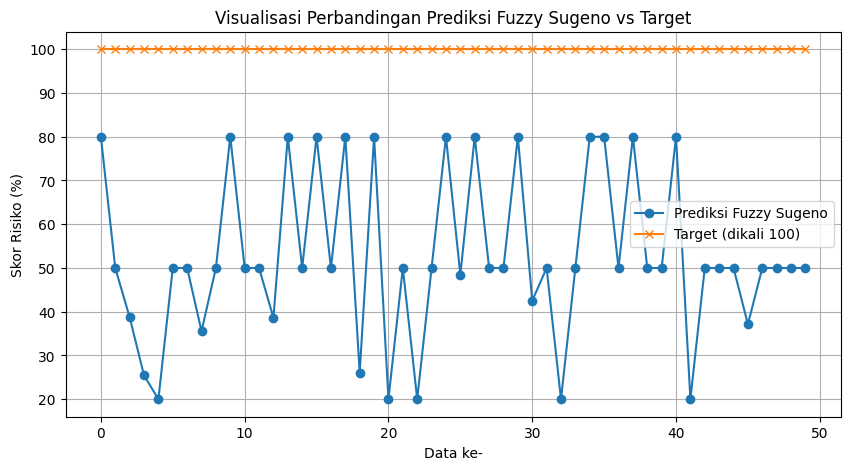

In [41]:
plt.figure(figsize=(10,5))
plt.plot(df_selected['prediksi_risk_sugeno'][:50], label='Prediksi Fuzzy Sugeno', marker='o')
plt.plot(df_selected['target'][:50]*100, label='Target (dikali 100)', marker='x')
plt.legend()
plt.title('Visualisasi Perbandingan Prediksi Fuzzy Sugeno vs Target')
plt.xlabel('Data ke-')
plt.ylabel('Skor Risiko (%)')
plt.grid(True)
plt.show()
